In [18]:
import pylab

In [19]:
import os
import cv2
import numpy as np
import matplotlib.image as mpimg

import matplotlib.pyplot as plt

import random
import json
from pycocotools.coco import COCO
import skimage.io as io

%matplotlib inline

In [20]:
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [21]:
len(os.listdir('../dataset/data'))

1190

In [5]:
# Read in the image
image_index = random.randint(0,1190)
image_path = f'../dataset/data/{os.listdir("../dataset/data/")[image_index]}'
image = mpimg.imread(image_path)

print('Image deminsions:', image.shape)

# gray_image =cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# plt.imshow(gray_image, cmap='gray')

Image deminsions: (842, 596, 3)


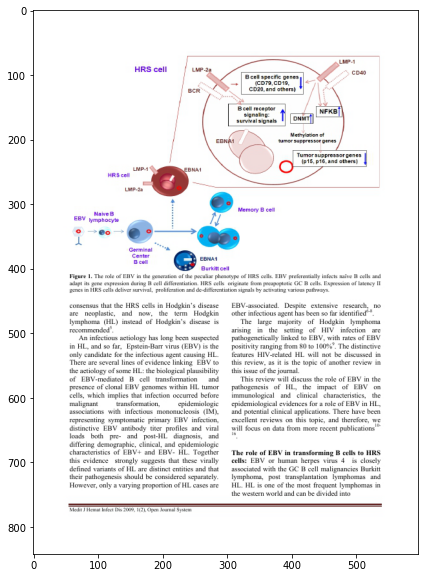

In [6]:
plt.figure(figsize = (20,10))
plt.imshow(image)

In [7]:
test = json.load(open('../dataset/test.json','r'))
train = json.load(open('../dataset/train.json','r'))

In [8]:
test.keys()

dict_keys(['images', 'annotations', 'categories'])

In [9]:
test['images']

[{'file_name': 'PMC3610354_00004.jpg',
  'width': 601,
  'id': 341577,
  'height': 792},
 {'file_name': 'PMC5485347_00005.jpg',
  'width': 601,
  'id': 341655,
  'height': 800},
 {'file_name': 'PMC3741993_00004.jpg',
  'width': 601,
  'id': 341709,
  'height': 792},
 {'file_name': 'PMC4663003_00003.jpg',
  'width': 601,
  'id': 341874,
  'height': 792},
 {'file_name': 'PMC4854984_00008.jpg',
  'width': 601,
  'id': 341944,
  'height': 800},
 {'file_name': 'PMC3306977_00003.jpg',
  'width': 601,
  'id': 341999,
  'height': 792},
 {'file_name': 'PMC3235906_00002.jpg',
  'width': 601,
  'id': 342183,
  'height': 792},
 {'file_name': 'PMC3614026_00005.jpg',
  'width': 601,
  'id': 342246,
  'height': 792},
 {'file_name': 'PMC5829348_00007.jpg',
  'width': 601,
  'id': 342275,
  'height': 800},
 {'file_name': 'PMC5292178_00004.jpg',
  'width': 601,
  'id': 342309,
  'height': 800},
 {'file_name': 'PMC3860124_00004.jpg',
  'width': 601,
  'id': 342434,
  'height': 792},
 {'file_name': 'PMC39

In [10]:
test['annotations']

[{'segmentation': [[50.58,
    499.46,
    290.7,
    499.46,
    290.7,
    512.9,
    103.45,
    512.9,
    103.45,
    524.26,
    50.58,
    524.26,
    50.58,
    512.59,
    50.58,
    499.46]],
  'area': 3828.070273007994,
  'iscrowd': 0,
  'image_id': 341577,
  'bbox': [0.08415973377703827,
   0.6306313131313132,
   0.39953410981697174,
   0.031325757575757576],
  'category_id': 1,
  'id': 3324007},
 {'segmentation': [[65.52,
    522.19,
    290.66,
    522.19,
    290.66,
    533.56,
    290.67,
    533.56,
    290.67,
    544.93,
    290.69,
    544.93,
    290.69,
    558.37,
    290.66,
    558.37,
    290.66,
    569.73,
    278.9,
    569.73,
    278.9,
    581.1,
    50.58,
    581.1,
    50.58,
    569.73,
    50.58,
    569.73,
    50.58,
    555.24,
    50.58,
    544.93,
    50.58,
    533.56,
    65.52,
    533.56,
    65.52,
    522.19]],
  'area': 13839.815264775883,
  'iscrowd': 0,
  'image_id': 341577,
  'bbox': [0.08415973377703827,
   0.6593308080808081,
   0

In [11]:
test['categories']

[{'supercategory': '', 'id': 1, 'name': 'text'},
 {'supercategory': '', 'id': 2, 'name': 'figure'}]

In [52]:
for i in test['images']:
    if i['file_name']=='PMC4894930_00005.jpg':
        print(i)

{'file_name': 'PMC3610354_00004.jpg', 'width': 601, 'id': 341577, 'height': 792}
{'file_name': 'PMC5485347_00005.jpg', 'width': 601, 'id': 341655, 'height': 800}
{'file_name': 'PMC3741993_00004.jpg', 'width': 601, 'id': 341709, 'height': 792}
{'file_name': 'PMC4663003_00003.jpg', 'width': 601, 'id': 341874, 'height': 792}
{'file_name': 'PMC4854984_00008.jpg', 'width': 601, 'id': 341944, 'height': 800}
{'file_name': 'PMC3306977_00003.jpg', 'width': 601, 'id': 341999, 'height': 792}
{'file_name': 'PMC3235906_00002.jpg', 'width': 601, 'id': 342183, 'height': 792}
{'file_name': 'PMC3614026_00005.jpg', 'width': 601, 'id': 342246, 'height': 792}
{'file_name': 'PMC5829348_00007.jpg', 'width': 601, 'id': 342275, 'height': 800}
{'file_name': 'PMC5292178_00004.jpg', 'width': 601, 'id': 342309, 'height': 800}
{'file_name': 'PMC3860124_00004.jpg', 'width': 601, 'id': 342434, 'height': 792}
{'file_name': 'PMC3981058_00003.jpg', 'width': 601, 'id': 342665, 'height': 792}
{'file_name': 'PMC3985332_00

In [71]:
k=0
for i,a in zip(train['images'],train['annotations']):
    if i['file_name']=='PMC4894930_00005.jpg':
        print(i,a,k)
    k+=1

{'file_name': 'PMC4894930_00005.jpg', 'width': 596, 'id': 401301, 'height': 791} {'segmentation': [[0.09511744966442953, 0.47006297229219146, 0.9036577181208054, 0.47006297229219146, 0.9036577181208054, 0.8876070528967255, 0.09511744966442953, 0.8876070528967255, 0.09511744966442953, 0.47006297229219146]], 'area': 159765.47905999993, 'iscrowd': 0, 'image_id': 362789, 'bbox': [0.09511744966442953, 0.47006297229219146, 0.8085402684563758, 0.41755667506297234], 'category_id': 2, 'id': 3530557} 628


In [121]:
cats = {}

In [126]:
cats = []
for i in train['annotations']:
    cats.append(i['category_id'])

In [127]:
set(cats)

{1, 2}

In [62]:
for i in test['annotations']:
    if i['id']==401301:
        print(i)

In [59]:
i['id']

4199922

In [68]:
train['annotations'][627]

{'segmentation': [[0.09511744966442953,
   0.11376574307304786,
   0.9036577181208054,
   0.11376574307304786,
   0.9036577181208054,
   0.34074307304785895,
   0.09511744966442953,
   0.34074307304785895,
   0.09511744966442953,
   0.11376574307304786]],
 'area': 86849.89069199997,
 'iscrowd': 0,
 'image_id': 362789,
 'bbox': [0.09511744966442953,
  0.11376574307304786,
  0.8085402684563758,
  0.22698992443324936],
 'category_id': 2,
 'id': 3530556}

In [69]:
train['annotations'][0]

{'segmentation': [[0.12840604026845637,
   0.10516627078384798,
   0.8724664429530201,
   0.10516627078384798,
   0.8724664429530201,
   0.12121140142517815,
   0.8724664429530201,
   0.12121140142517815,
   0.8724664429530201,
   0.13572446555819478,
   0.8708892617449664,
   0.13572446555819478,
   0.8708892617449664,
   0.15312351543942992,
   0.8703691275167785,
   0.15312351543942992,
   0.8703691275167785,
   0.16934679334916866,
   0.8707046979865772,
   0.16934679334916866,
   0.8707046979865772,
   0.18445368171021378,
   0.8732885906040269,
   0.18445368171021378,
   0.8732885906040269,
   0.19989311163895487,
   0.12840604026845637,
   0.19989311163895487,
   0.12840604026845637,
   0.18445368171021378,
   0.12840604026845637,
   0.16934679334916866,
   0.12840604026845637,
   0.1523871733966746,
   0.12840604026845637,
   0.13679334916864608,
   0.12840604026845637,
   0.12121140142517815,
   0.12840604026845637,
   0.10516627078384798]],
 'area': 35332.528004231805,
 'iscr

In [70]:
train['images'][0]

{'file_name': 'PMC6027269_00003.jpg',
 'width': 596,
 'id': 357955,
 'height': 842}

In [22]:
coco_test = COCO('../dataset/test.json')

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [23]:
coco_test.getAnnIds()

[3324007,
 3324008,
 3324009,
 3324010,
 3324011,
 3324012,
 3324013,
 3324014,
 3324015,
 3324016,
 3324017,
 3324852,
 3324853,
 3324854,
 3324855,
 3324856,
 3324857,
 3324858,
 3324859,
 3324860,
 3324861,
 3324862,
 3324863,
 3325476,
 3325477,
 3325478,
 3325479,
 3327415,
 3327416,
 3327417,
 3327418,
 3327419,
 3327420,
 3327421,
 3328206,
 3328207,
 3328208,
 3328209,
 3328210,
 3328211,
 3328212,
 3328213,
 3328810,
 3328811,
 3328812,
 3328813,
 3328814,
 3328815,
 3328816,
 3328817,
 3328818,
 3330690,
 3330691,
 3330692,
 3330693,
 3330694,
 3330695,
 3330696,
 3330697,
 3331193,
 3331194,
 3331195,
 3331196,
 3331197,
 3331475,
 3331476,
 3331477,
 3331478,
 3331479,
 3331480,
 3331481,
 3331482,
 3331788,
 3331789,
 3333063,
 3333064,
 3333065,
 3333066,
 3333067,
 3333068,
 3335268,
 3335269,
 3335270,
 3335271,
 3335272,
 3336324,
 3336325,
 3336326,
 3336327,
 3336328,
 3336329,
 3336330,
 3336331,
 3336332,
 3336333,
 3336350,
 3336351,
 3336352,
 3336353,
 3336354,


In [24]:
[coco_test.anns][:10]

[{3324007: {'segmentation': [[50.58,
     499.46,
     290.7,
     499.46,
     290.7,
     512.9,
     103.45,
     512.9,
     103.45,
     524.26,
     50.58,
     524.26,
     50.58,
     512.59,
     50.58,
     499.46]],
   'area': 3828.070273007994,
   'iscrowd': 0,
   'image_id': 341577,
   'bbox': [0.08415973377703827,
    0.6306313131313132,
    0.39953410981697174,
    0.031325757575757576],
   'category_id': 1,
   'id': 3324007},
  3324008: {'segmentation': [[65.52,
     522.19,
     290.66,
     522.19,
     290.66,
     533.56,
     290.67,
     533.56,
     290.67,
     544.93,
     290.69,
     544.93,
     290.69,
     558.37,
     290.66,
     558.37,
     290.66,
     569.73,
     278.9,
     569.73,
     278.9,
     581.1,
     50.58,
     581.1,
     50.58,
     569.73,
     50.58,
     569.73,
     50.58,
     555.24,
     50.58,
     544.93,
     50.58,
     533.56,
     65.52,
     533.56,
     65.52,
     522.19]],
   'area': 13839.815264775883,
   'iscrowd': 0

In [26]:
catIds = coco_test.getCatIds(catNms=['text', 'figure']);
imgIds = coco_test.getImgIds(catIds=catIds);
img = coco_test.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
W = img['width']
H = img['height']

In [27]:
for i in imgIds:
    img = coco_test.loadImgs(i)
    if len(img)>1:
        print(len(img))

In [99]:
len(imgIds)

170

In [19]:
from PIL import Image

In [20]:
I = Image.open('../dataset' + '/data/' + img['file_name'], 'r')

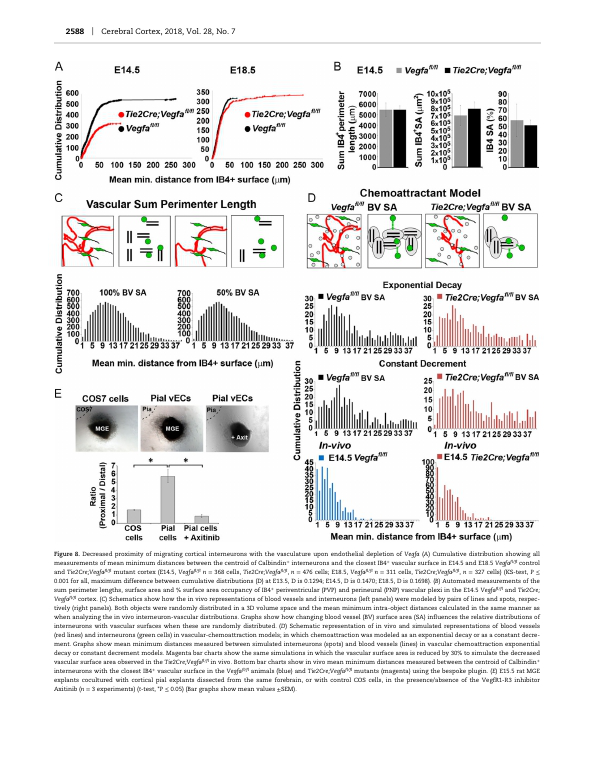

In [21]:
I

(783, 594, 3)
594 783


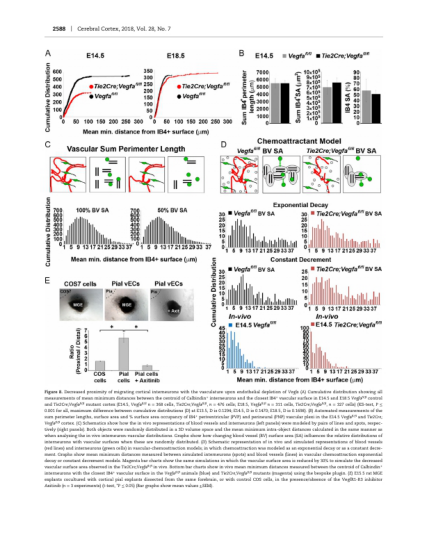

In [14]:
I = io.imread('../dataset' + '/data/' + img['file_name'])
print(I.shape)
print(W,H)
plt.axis('off')
plt.imshow(I)
plt.show()

In [15]:
import torchvision.transforms.functional as FT

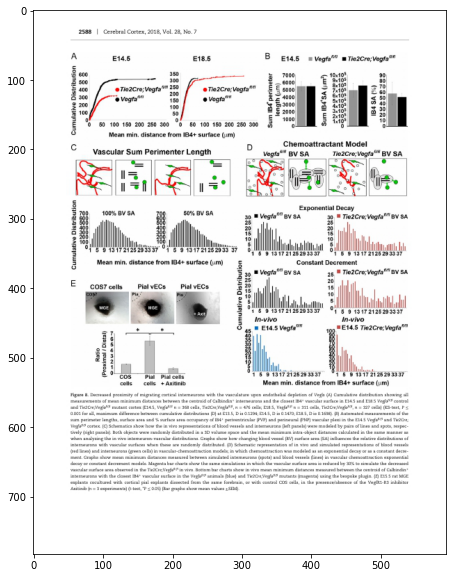

In [16]:
plt.imshow(I)

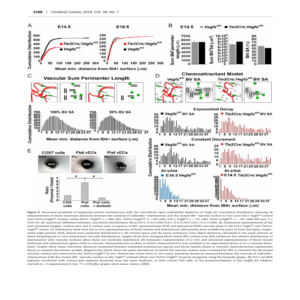

In [22]:
FT.resize(I, (300,300))

In [137]:
anns

[{'segmentation': [[52.55,
    655.99,
    291.62,
    655.99,
    291.62,
    664.86,
    97.99,
    664.86,
    97.99,
    675.8,
    52.55,
    675.8,
    52.55,
    666.93,
    52.55,
    655.99]],
  'area': 2617.0936920155655,
  'iscrowd': 0,
  'image_id': 353927,
  'bbox': [0.08817114093959731,
   0.826183879093199,
   0.40110738255033557,
   0.02494962216624685],
  'category_id': 1,
  'id': 3446147},
 {'segmentation': [[303.59,
    655.99,
    542.66,
    655.99,
    542.66,
    666.9,
    542.7,
    666.9,
    542.7,
    677.93,
    542.7,
    677.93,
    542.7,
    686.8,
    542.65,
    686.8,
    542.65,
    699.81,
    542.67,
    699.81,
    542.67,
    710.81,
    542.71,
    710.81,
    542.71,
    721.75,
    542.73,
    721.75,
    542.73,
    730.62,
    542.67,
    730.62,
    542.67,
    741.56,
    542.66,
    741.56,
    542.66,
    752.56,
    303.59,
    752.56,
    303.59,
    743.69,
    303.59,
    732.69,
    303.59,
    721.75,
    303.59,
    710.81,
    3

In [28]:
cat_color = {1:(255,0,0),2:(0,0,255)}

In [30]:
img

[{'file_name': 'PMC2964036_00007.jpg',
  'width': 601,
  'id': 344570,
  'height': 792}]

In [31]:
annIds = coco_test.getAnnIds(imgIds=img[0]['id'], catIds=catIds, iscrowd=None)
anns = coco_test.loadAnns(annIds)

In [32]:
anns

[{'segmentation': [[50.73,
    680.79,
    548.8,
    680.79,
    548.8,
    691.14,
    548.86,
    691.14,
    548.86,
    700.77,
    548.84,
    700.77,
    548.84,
    711.23,
    548.81,
    711.23,
    548.81,
    721.47,
    548.86,
    721.47,
    548.86,
    732.35,
    506.94,
    732.35,
    506.94,
    742.81,
    118.75,
    742.81,
    118.75,
    737.49,
    50.73,
    737.49,
    50.73,
    732.35,
    50.73,
    732.35,
    50.73,
    721.47,
    50.73,
    712.18,
    50.73,
    701.71,
    50.73,
    701.71,
    50.73,
    690.32,
    50.73,
    690.32,
    50.73,
    680.79]],
  'area': 30091.59706475213,
  'iscrowd': 0,
  'image_id': 344570,
  'bbox': [0.08440931780366057,
   0.8595833333333333,
   0.8288352745424292,
   0.07830808080808081],
  'category_id': 1,
  'id': 3354368},
 {'segmentation': [[95.0,
    78.82,
    502.7,
    78.82,
    502.7,
    666.5,
    95.0,
    666.5,
    95.0,
    78.82]],
  'area': 239600.9342361532,
  'iscrowd': 0,
  'image_id': 344

In [24]:
img['id']

352172

In [36]:
def plot_img_bboxes(anns, cat_color):
    
    for i in anns:
        [x,y,w,h] = i['bbox']
        Inp = np.asarray(I)
        cv2.rectangle(Inp, (int(x*W), int(y*H)), 
                      (int((x+w)*W), int((y+h)*H)), 
                      cat_color[int(i['category_id'])], int(i['category_id']) + 1)
    plt.imshow(Inp)
    plt.show()

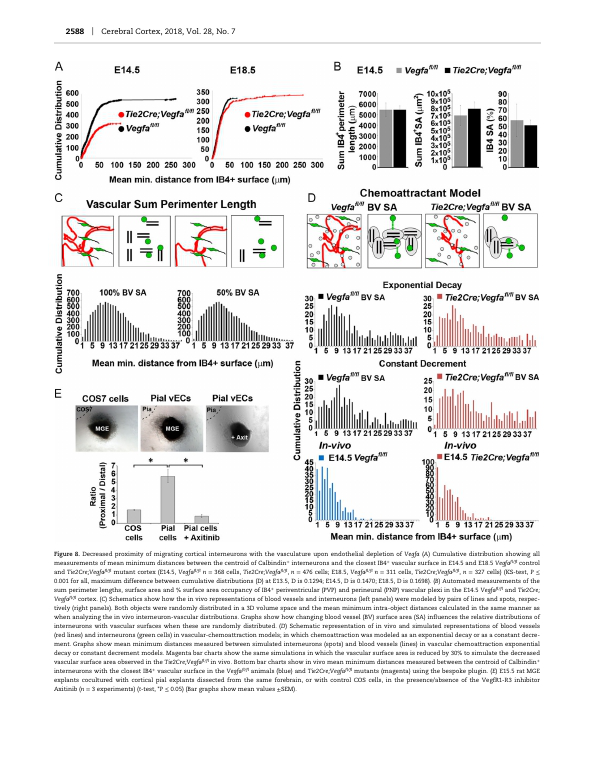

In [38]:
I

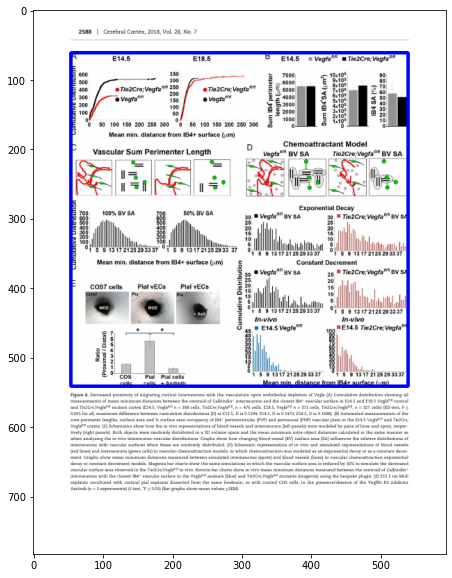

In [37]:
plot_img_bboxes(anns, cat_color)

In [39]:
I.rectangle(((20, 20),(20+20, 20+20)), outline='Red')

AttributeError: rectangle

In [41]:
from PIL import Image, ImageDraw as D

In [54]:
[x,y,w,h] = anns[0]['bbox']

In [48]:
[x,y,w,h] = i['bbox']

NameError: name 'i' is not defined

In [93]:
I = Image.open('../dataset' + '/data/' + img['file_name'], 'r')

In [94]:
draw=D.Draw(I)
draw.rectangle([(int(x*W), int(y*H)), (int((x+w)*W), int((y+h)*H))],outline=(0,0,255), width=5)
draw.rectangle([(100, 100), (500, 500)],outline="red", width=10)

In [95]:
(int(x*W), int(y*H)), (int((x+w)*W), int((y+h)*H))

((54, 551), (540, 693))

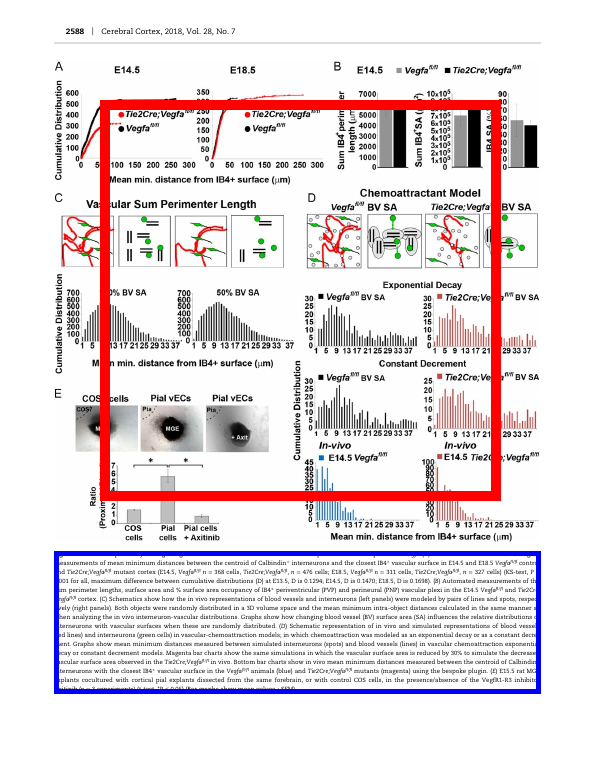

In [96]:
I

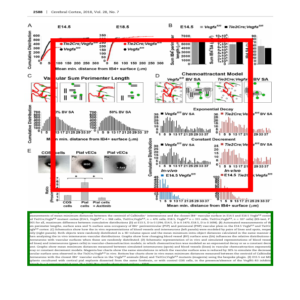

In [81]:
FT.resize(I, (300,300))

In [84]:
I = Image.open('../dataset' + '/data/' + img['file_name'], 'r')
I = FT.resize(I, (300,300))
draw=D.Draw(I)
draw.rectangle([(int(x*300), int(y*300)), (int((x+w)*300), int((y+h)*300))],outline="green", width=5)

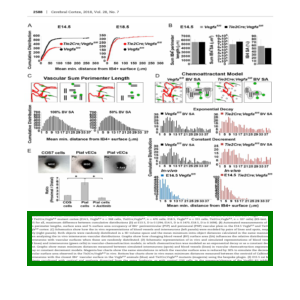

In [85]:
I

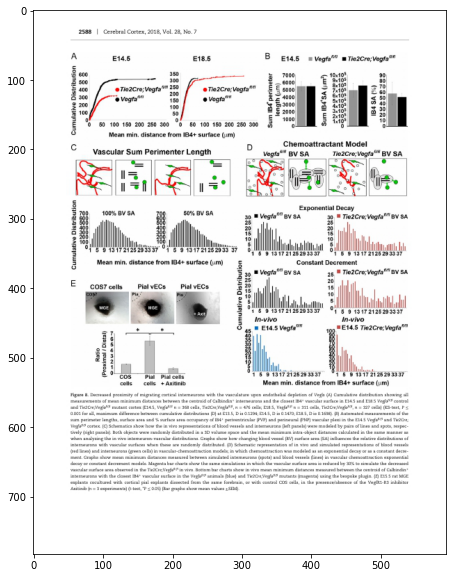

In [35]:
plot_img_bboxes(anns, cat_color)

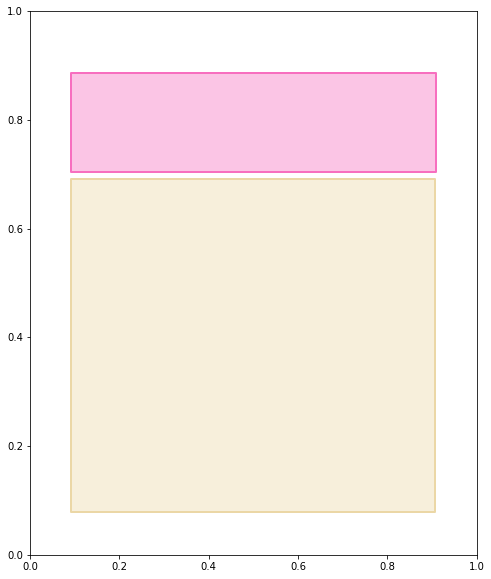

In [86]:
coco_test.showAnns(anns, draw_bbox=True)

In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.datasets import MILDataset

In [4]:
import time
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data

In [5]:
test_dataset = MILDataset('../dataset','test')

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


hight = 842, wight=596, img_id=354309


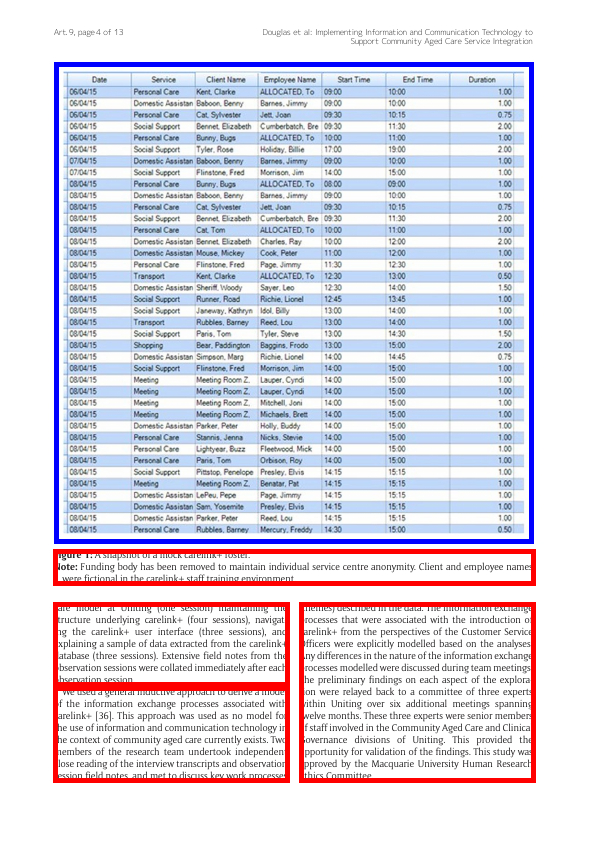

In [6]:
test_dataset.plot_image_w_bb(1)

hight = 300, wight=300, img_id=354309


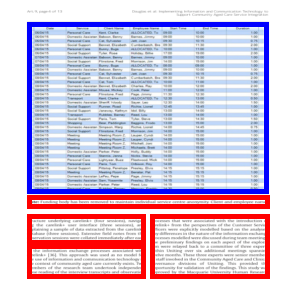

In [7]:
test_dataset.plot_image_w_bb(1,True)

In [9]:
test_dataset[1]

(tensor([[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          ...,
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],
 
         [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          ...,
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],
 
         [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ...,

In [9]:
max([1,2,3,4])

4

In [110]:
train_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1)